#  Losso Rige & Elastic net & cross validation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\anil.nagamunthala\Downloads\Algerian_forest_fires_dataset_UPDATE.csv")
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


# Preprocessing

initially it is showing that names of attributes has only one and it is Bejaia so we remove that

In [3]:
dataframe=pd.read_csv(r"C:\Users\anil.nagamunthala\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",header=1)
dataframe.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataframe.shape

(246, 14)

In [5]:
dataframe.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [6]:
dataframe.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
dataframe[dataframe.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
dataframe=dataframe.dropna().reset_index(drop=True)
dataframe.shape

(244, 14)

In [9]:
dataframe.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [10]:
dataframe=dataframe.drop([122]).reset_index(drop=True)
dataframe.shape

(243, 14)

In [11]:
dataframe.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

### Checking the datatypes

In [12]:
dataframe.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [13]:
dataframe.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [14]:
dataframe.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

We can clearly see that there is spaces in column names 

In [15]:
dataframe.columns=dataframe.columns.str.strip()
dataframe.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [16]:
dataframe[['day','month','year','Temperature','RH','Ws']]=dataframe[['day','month','year','Temperature','RH','Ws']].astype(int)

In [17]:
dataframe.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [18]:
for col in dataframe.columns:
    if dataframe[col].dtypes == 'object' and col != 'Classes':
        dataframe[col]=dataframe[col].astype(float)

In [19]:
dataframe.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [20]:
dataframe['Classes'].head()

0    not fire   
1    not fire   
2    not fire   
3    not fire   
4    not fire   
Name: Classes, dtype: object

In [21]:
dataframe['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [22]:
dataframe.loc[0:122,'Class']=dataframe['Classes'].str.contains('not fire')

In [23]:
def fun(x):
    return str(x).strip()

dataframe['Classes']=dataframe['Classes'].apply(fun)

In [24]:
dataframe['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [25]:
dataframe.loc[ :122,'region']=0
dataframe.loc[123: ,'region']=1

In [26]:
dataframe.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Class', 'region'],
      dtype='object')

In [27]:
dataframe.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Class,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,True,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,True,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,True,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,True,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,True,0.0


In [28]:
dataframe['region']=dataframe['region'].astype(int)

In [29]:
dataframe.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Class,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,True,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,True,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,True,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,True,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,True,0


# Exploretory data Analysis

In [30]:
df_eda=dataframe.copy()
df_eda.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Class,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,True,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,True,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,True,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,True,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,True,0


In [31]:
df_eda['Classes']=np.where(df_eda['Classes']== 'not fire',0,1)

In [32]:
df_eda['Classes'].head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int32

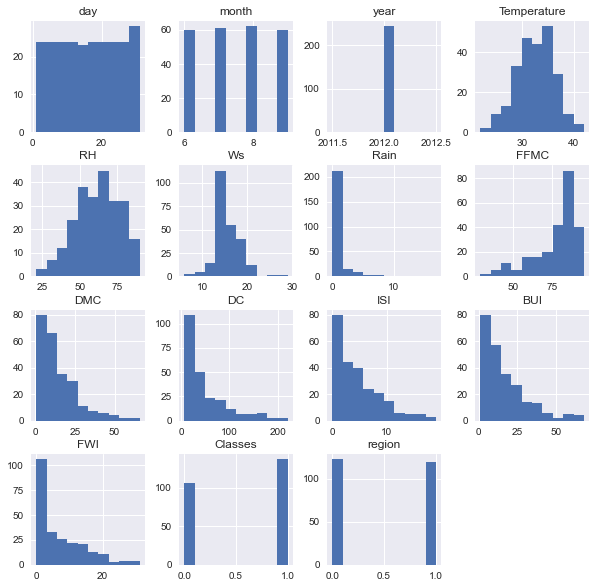

In [33]:
plt.style.use('seaborn')
df_eda.hist(figsize=(10,10))
plt.show()

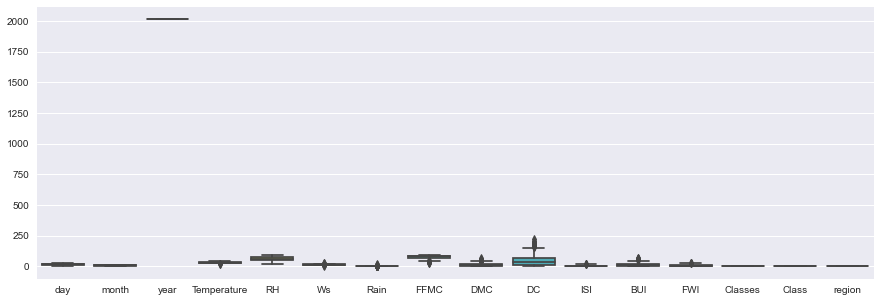

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_eda)
plt.show()

In [35]:
value=df_eda['Classes'].value_counts()

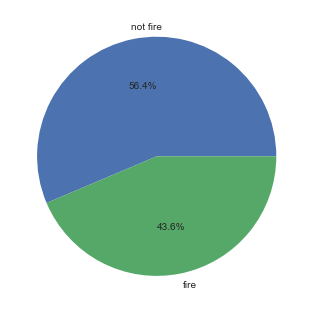

In [36]:
plt.pie(value,labels=['not fire','fire'],autopct='%1.1f%%',center=(5,5))
plt.show()

In [37]:
#Correlation
corelate=df_eda.corr()

In [38]:
df_eda.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.014590
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.012971
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269920
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.407692
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.170922
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.039756
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.234178
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.200209
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.071605


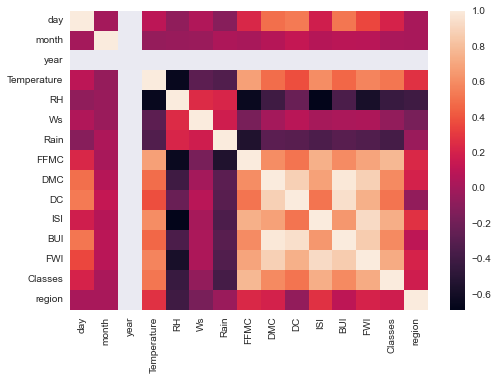

In [39]:
sns.heatmap(corelate)
plt.show()

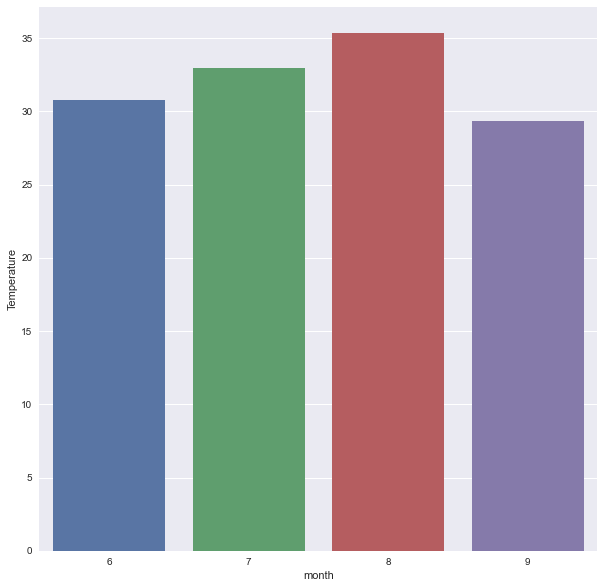

In [40]:
#monthly temperature
plt.subplots(figsize=(10,10))
sns.barplot(data=df_eda,x='month',y='Temperature',ci=0)
plt.show()

# Feature engineering

In [41]:
dataframe.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Class,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,True,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,True,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,True,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,True,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,True,0


In [42]:
del dataframe['Class']
dataframe

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [43]:
df_fe=dataframe.copy()

In [44]:
df_fe.drop(['day','month','year'],axis=1,inplace=True)

In [45]:
df_fe.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [46]:
df_fe['Classes']=np.where(df_fe['Classes'].str.contains("not fire"),0,1)

In [47]:
df_fe.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269920
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.407692
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.170922
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.039756
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.234178
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.200209
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.071605
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.271439
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.097467
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.204693


In [48]:
df_fe.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# dependent and independent features

In [49]:
X=df_fe.drop(['FWI'],axis=1)
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [50]:
y=df_fe['FWI']
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

# splitting

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=12)
print('X_train:', X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (72, 11)
X_test : (171, 11)
y_train: (72,)
y_test: (171,)


In [52]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.727132,-0.332872,-0.327353,0.677848,0.485289,0.351688,0.586131,0.446211,0.544503,0.298801
RH,-0.727132,1.000000,0.303750,0.237180,-0.702421,-0.383785,-0.181228,-0.625563,-0.319469,-0.422839,-0.377391
Ws,-0.332872,0.303750,1.000000,-0.027890,-0.221105,0.030330,0.106419,-0.016526,0.057025,-0.074841,-0.040471
Rain,-0.327353,0.237180,-0.027890,1.000000,-0.652676,-0.402298,-0.422241,-0.542185,-0.414030,-0.582977,0.211218
FFMC,0.677848,-0.702421,-0.221105,-0.652676,1.000000,0.613372,0.516919,0.788074,0.593308,0.788974,0.113838
DMC,0.485289,-0.383785,0.030330,-0.402298,0.613372,1.000000,0.869541,0.781912,0.981813,0.602305,0.104990
DC,0.351688,-0.181228,0.106419,-0.422241,0.516919,0.869541,1.000000,0.645860,0.945680,0.571461,-0.221830
ISI,0.586131,-0.625563,-0.016526,-0.542185,0.788074,0.781912,0.645860,1.000000,0.751002,0.792719,0.178878
BUI,0.446211,-0.319469,0.057025,-0.414030,0.593308,0.981813,0.945680,0.751002,1.000000,0.603828,-0.019864
Classes,0.544503,-0.422839,-0.074841,-0.582977,0.788974,0.602305,0.571461,0.792719,0.603828,1.000000,0.016089


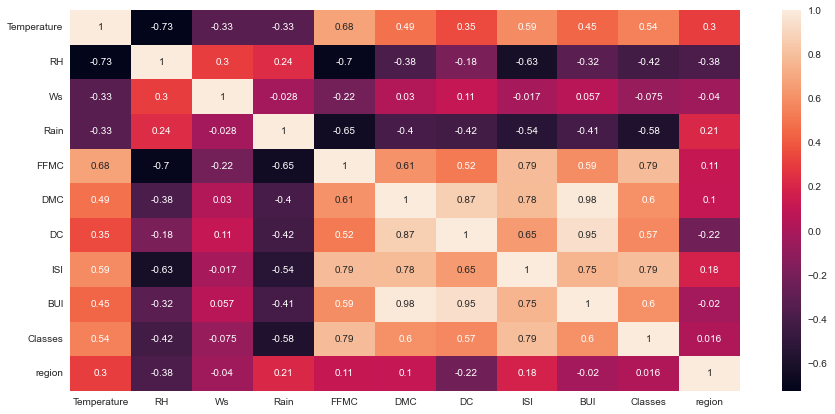

In [53]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [54]:
def correlation(dataset,threshhold):
    corr_matrix=dataset.corr()
    cols=set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshhold:
                colname=corr_matrix.columns[i]
                cols.add(colname)
            
    return cols   




In [55]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [56]:
X_train=X_train.drop(['BUI','DC'],axis=1)
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
20,30,78,14,0.0,81.0,6.3,2.6,1,0
121,25,78,14,1.4,45.0,1.9,0.2,0,0
99,30,73,17,0.9,62.0,2.6,1.1,0,0
84,34,64,14,0.0,88.9,40.5,9.0,1,0
59,31,79,15,0.0,85.4,28.5,4.7,1,0


In [57]:
X_test=X_test.drop(['BUI','DC'],axis=1)
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
151,34,42,15,1.7,79.7,12.0,2.2,0,1
31,27,75,19,1.2,55.7,2.4,0.8,0,0
48,35,59,17,0.0,88.1,12.0,7.7,1,0
61,36,45,14,0.0,78.8,4.8,2.0,0,0
238,30,65,14,0.0,85.4,16.0,4.5,1,1


#  Feature Scaling and Standerdization

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [60]:
X_train_scaled

array([[-7.13401913e-01,  1.31601703e+00, -4.62861858e-01,
        -5.06139418e-01,  1.45383972e-01, -7.68090342e-01,
        -6.56471987e-01,  7.51809412e-01, -9.45905303e-01],
       [-2.12452658e+00,  1.31601703e+00, -4.62861858e-01,
         6.74852557e-01, -2.38711102e+00, -1.14244576e+00,
        -1.33493107e+00, -1.33012434e+00, -9.45905303e-01],
       [-7.13401913e-01,  9.24150918e-01,  5.57323461e-01,
         2.53069709e-01, -1.19121061e+00, -1.08288922e+00,
        -1.08050892e+00, -1.33012434e+00, -9.45905303e-01],
       [ 4.15497818e-01,  2.18791913e-01, -4.62861858e-01,
        -5.06139418e-01,  7.01125928e-01,  2.14167221e+00,
         1.15275225e+00,  7.51809412e-01, -9.45905303e-01],
       [-4.31176981e-01,  1.39439025e+00, -1.22800085e-01,
        -5.06139418e-01,  4.54911137e-01,  1.12070289e+00,
        -6.28202859e-02,  7.51809412e-01, -9.45905303e-01],
       [-1.48952048e-01,  9.24150918e-01, -1.22800085e-01,
        -5.06139418e-01,  5.39327637e-01,  9.675574

# Box Plots To understand Effect Of Standard Scaler

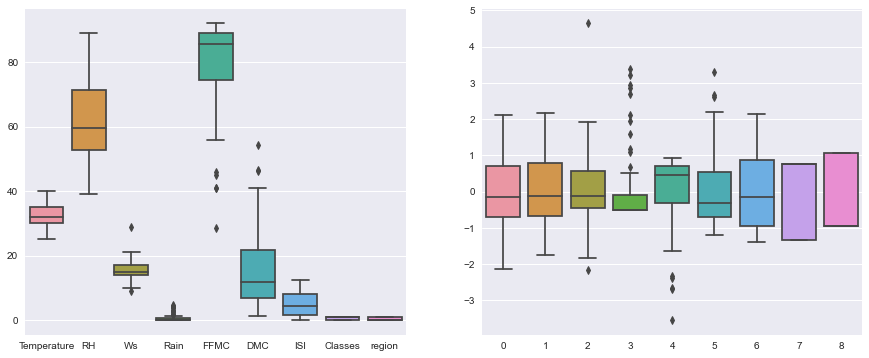

In [61]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.show()

# Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse=mean_squared_error(y_test,y_pred)
print('mse',mse)
r2=r2_score(y_test,y_pred)
print('r2',r2)

mae: 0.8157934760244189
mse 2.576435336462028
r2 0.9545995566270951


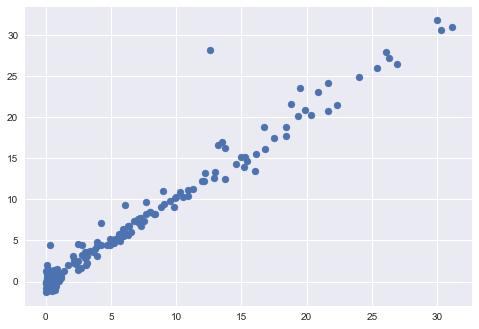

In [64]:
plt.scatter(y_test,y_pred)
plt.show()

# Lasso Regression

In [65]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse=mean_squared_error(y_test,y_pred)
print('mse',mse)
r2=r2_score
(y_test,y_pred)
print('r2',r2)

mae: 0.9449173980071973
mse 2.424315879978642
r2 <function r2_score at 0x00000238F4D29940>


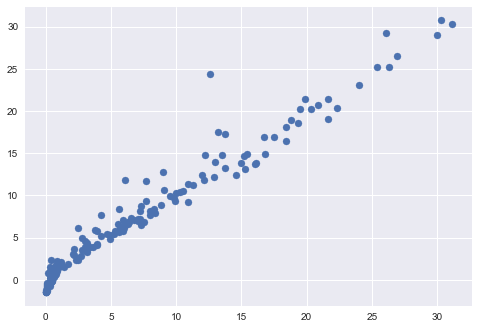

In [67]:
plt.scatter(y_test,y_pred)
plt.show()

# Ridge Regression

In [68]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse=mean_squared_error(y_test,y_pred)
print('mse',mse)
r2=r2_score(y_test,y_pred)
print('r2',r2)

mae: 0.7985241768906898
mse 2.508765195458174
r2 0.9557920004510106


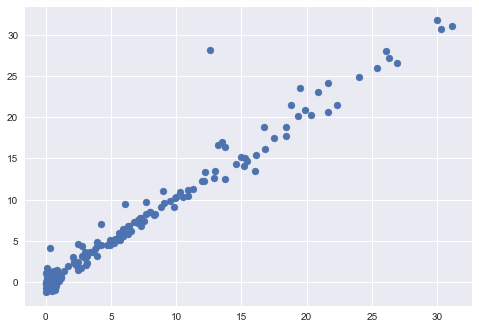

In [70]:
plt.scatter(y_test,y_pred)
plt.show()

# Elastic net

In [71]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(X_train,y_train)
y_pred=en.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse=mean_squared_error(y_test,y_pred)
print('mse',mse)
r2=r2_score(y_test,y_pred)
print('r2',r2)

mae: 0.9313395869463807
mse 2.4518494995330697
r2 0.9567949357055106


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


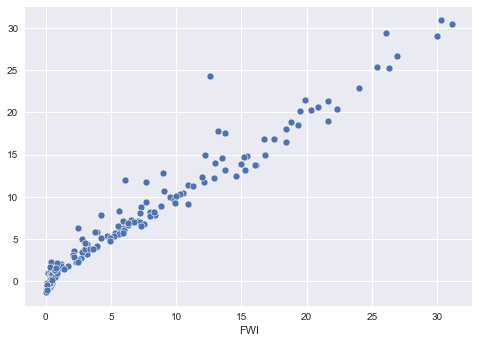

In [73]:
sns.scatterplot(y_test,y_pred)
plt.show()

# Cross validation

# LassoCV

mae: 0.7445952849727359
mse 2.3417426773217067
r2 0.9587351740169607


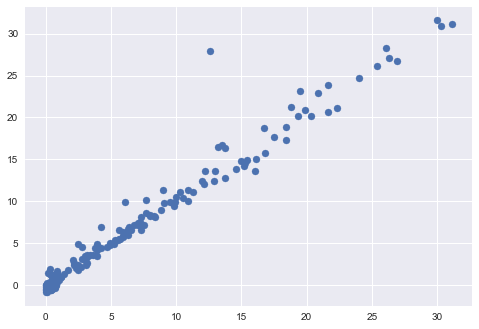

In [74]:
from sklearn.linear_model import LassoCV
lasso=LassoCV(cv=5)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse=mean_squared_error(y_test,y_pred)
print('mse',mse)
r2=r2_score(y_test,y_pred)
print('r2',r2)

plt.scatter(y_test,y_pred)
plt.show()

In [75]:
lasso.alpha_

0.0777758487654321

In [76]:
lasso.alphas_

array([77.77584877, 72.53401687, 67.64546689, 63.08638882, 58.83457736,
       54.86932376, 51.17131498, 47.72253961, 44.50620017, 41.50663123,
       38.7092232 , 36.10035112, 33.66730827, 31.39824438, 29.28210779,
       27.30859173, 25.46808405, 23.75162042, 22.1508407 , 20.65794817,
       19.2656716 , 17.96722982, 16.75629866, 15.62698021, 14.57377405,
       13.59155046, 12.67552544, 11.82123745, 11.02452561, 10.28150948,
        9.58857016,  8.94233262,  8.33964933,  7.77758488,  7.25340169,
        6.76454669,  6.30863888,  5.88345774,  5.48693238,  5.1171315 ,
        4.77225396,  4.45062002,  4.15066312,  3.87092232,  3.61003511,
        3.36673083,  3.13982444,  2.92821078,  2.73085917,  2.5468084 ,
        2.37516204,  2.21508407,  2.06579482,  1.92656716,  1.79672298,
        1.67562987,  1.56269802,  1.4573774 ,  1.35915505,  1.26755254,
        1.18212375,  1.10245256,  1.02815095,  0.95885702,  0.89423326,
        0.83396493,  0.77775849,  0.72534017,  0.67645467,  0.63

#  RidgeCV

mae: 0.7985241768906898
mse 2.508765195458174
r2 0.9557920004510106


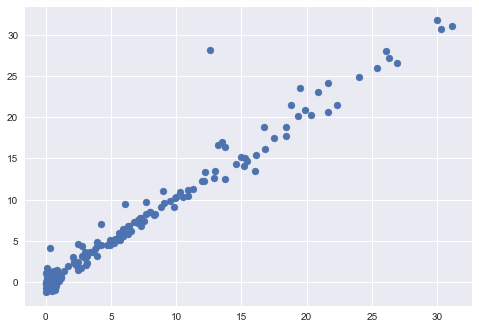

In [77]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(X_train,y_train)
y_pred=ridge_cv.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse=mean_squared_error(y_test,y_pred)
print('mse',mse)
r2=r2_score(y_test,y_pred)
print('r2',r2)

plt.scatter(y_test,y_pred)
plt.show()

# ElasticNetCV

mae: 0.7469345048061063
mse 2.2868821173478646
r2 0.9597018948623278


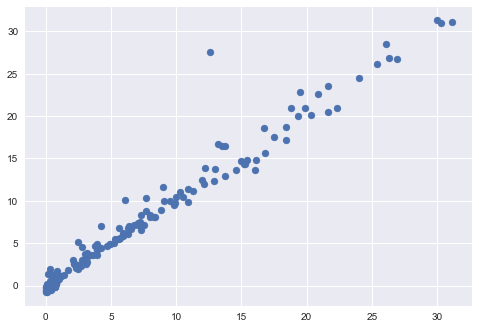

In [78]:
from sklearn.linear_model import ElasticNetCV
en_cv=ElasticNetCV(cv=5)
en_cv.fit(X_train,y_train)
y_pred=en_cv.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse=mean_squared_error(y_test,y_pred)
print('mse',mse)
r2=r2_score(y_test,y_pred)
print('r2',r2)

plt.scatter(y_test,y_pred)
plt.show()